In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

(400, 400)

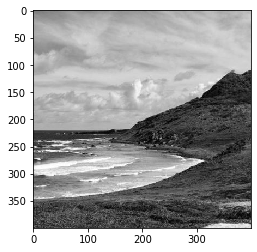

In [3]:
imag = cv2.imread('paisagem.jpg', 0)
# plt.figure(figsize=(10,10))
plt.imshow(imag, 'gray')
imag.shape

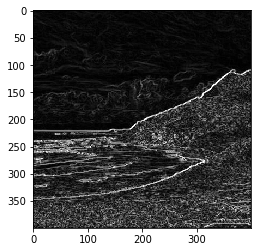

In [9]:
def getGradientMagnitude(im):
    "Get magnitude of gradient for given image"
    ddepth = cv2.CV_32F
    x = cv2.Sobel(im, ddepth, 1, 0)
    y = cv2.Sobel(im, ddepth, 0, 1)
    x_abs = cv2.convertScaleAbs(x)
    y_abs = cv2.convertScaleAbs(y)
    mat_energy = cv2.addWeighted(x_abs, 0.5, y_abs, 0.5, 0)
    return mat_energy

# plt.figure(figsize=(10,10))
plt.imshow(getGradientMagnitude(imag), 'gray');

In [5]:
def rotate_bound(image, angle):
    # grab the dimensions of the image and then determine the
    # center
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)
 
    # grab the rotation matrix (applying the negative of the
    # angle to rotate clockwise), then grab the sine and cosine
    # (i.e., the rotation components of the matrix)
    M = cv2.getRotationMatrix2D((cX, cY), -angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
 
    # compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
 
    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY
 
    # perform the actual rotation and return the image
    return cv2.warpAffine(image, M, (nW, nH))

In [19]:
def my_seam(image, iterations=1, axis=1):
    
    ret = np.zeros((image.shape[0]+iterations, image.shape[1]+iterations))
    
    if iterations < 1:
        iterations = 1
        
    if axis == 0:
        ret = rotate_bound(ret, 90)
    
    for k in range(iterations):
        height = ret.shape[0]
        altura = ret.shape[0]
        width = ret.shape[1]
        largura = ret.shape[1]
        
        mat_energy = getGradientMagnitude(ret)

        mask = np.zeros(ret.shape).astype('uint16')

        mask = mat_energy

        for i in range(1,altura):
            for j in range(0, largura):
                if(j == 0): #sendo o primeiro da coluna não tem ninguem do lado esquerdo                        
                    mask[i,j] += min(mat_energy[i-1, j], mat_energy[i-1, j+1])
                elif(j == largura-1): #sendo o ultimo da coluna não tem ninguem do lado direito
                    mask[i,j] += min(mat_energy[i-1, j], mat_energy[i-1, j-1])
                else: #estou no meio
                    mask[i,j] += min(mat_energy[i-1, j-1], mat_energy[i-1, j], mat_energy[i-1, j+1])

        index = np.argmin(mask[height-1, :])

        for i in range(height-1, -1, -1):
            ret[i, index:width-2] = ret[i, index+1:width-1]
            if index == 0:
                index = np.argmin((mask[i-1, index], mask[i-1, index+1]))
            elif index == width-1:
                index = (index-1) + np.argmin((mask[i-1, index-1], mask[i-1, index]))
            else:
                index = (index-1) + np.argmin((mask[i-1, index-1], mask[i-1, index], mask[i-1, index+1]))

        ret = ret[:, :-1]
        
    if axis == 0:
        ret = rotate_bound(ret, -90)
        
    return ret

In [20]:
%%time
a = my_seam(imag, iterations=20, axis=1)
plt.imshow(a, 'gray')
a.shape

error: OpenCV(4.1.0) /io/opencv/modules/imgproc/src/filter.simd.hpp:3020: error: (-213:The function/feature is not implemented) Unsupported combination of buffer format (=6), and destination format (=5) in function 'getLinearColumnFilter'


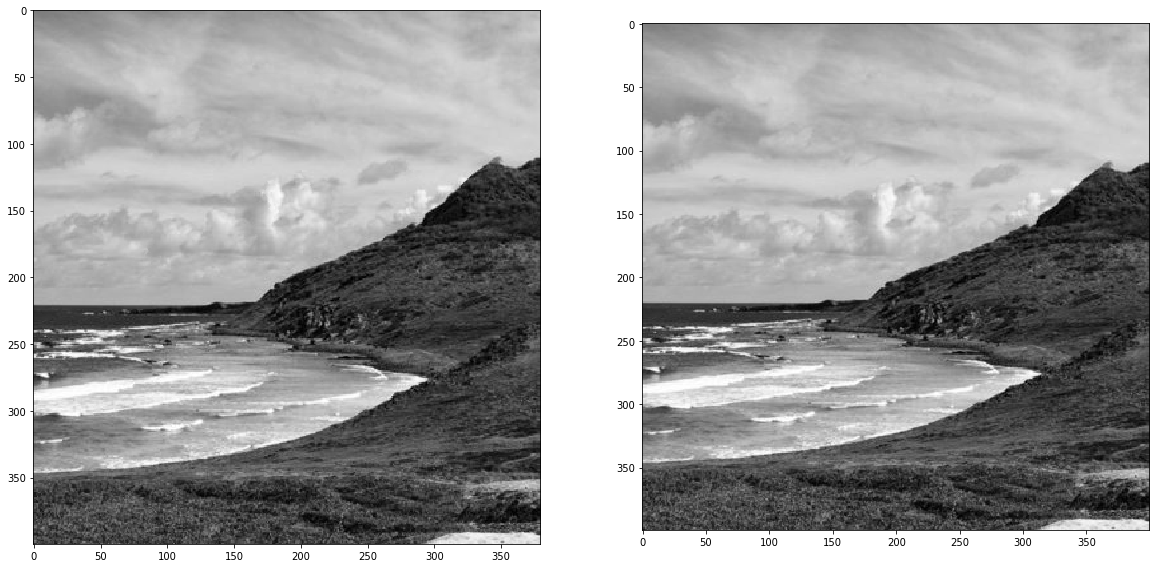

In [17]:
plt.figure(figsize=(20,20))
plt.subplot(121), plt.imshow(a, 'gray');
plt.subplot(122), plt.imshow(imag, 'gray');